In [1]:
import pandas as pd                            # File Handling
import numpy as np                             # Mathematical Computation

In [2]:
from sklearn.model_selection import train_test_split                
# Splitting Dataset into Train/Test sets

In [3]:
from sklearn.tree import DecisionTreeClassifier                     
# For implementing Decision Tree classifier

In [4]:
from sklearn.metrics import accuracy_score                          # For calculating accuracy
from sklearn.metrics import classification_report                   # For evaluating the model

In [5]:
from sklearn import tree                                            # Visualizing Decision Tree

In [6]:
Dataset = pd.read_csv("Iris.csv")

In [7]:
Dataset = Dataset.dropna()                     # Dropping empty rows

In [8]:
Dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
Dataset.shape

(150, 5)

In [12]:
Dataset['species'].unique()                      # Unique values of Species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
Dataset = Dataset.replace(to_replace ="Iris-setosa",          value ="0") 
Dataset = Dataset.replace(to_replace ="Iris-versicolor",      value ="1") 
Dataset = Dataset.replace(to_replace ="Iris-virginica",       value ="2") 

In [15]:
X = np.array(Dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])                   # Input
Y = np.array(Dataset["species"])                                                                            # Targets

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100)                                    # 80:20

In [17]:
clf_gini = DecisionTreeClassifier(criterion = "gini",                # Criterion
                                  max_depth = 5,                     # Max Height of Tree
                                  min_samples_leaf = 3,              # Maximum Leaf samples
                                  random_state = 100)

In [18]:
clf_gini.fit(X_train, Y_train)                                       # Training the Model

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=100)

In [19]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",          # Criterion
                                     max_depth = 5,                  # Max Height of Tree
                                     min_samples_leaf = 3,           # Max Leaf samples
                                     random_state = 100)

In [20]:
clf_entropy.fit(X_train, Y_train)                                    # Training the model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=100)

In [21]:
y_pred_gini = clf_gini.predict(X_test)                                # Performing Prediction on test input

In [22]:
print ("Accuracy : ", accuracy_score(Y_test,y_pred_gini)*100)         # Evaulating predictions with test labels
print ("Report : ",  classification_report(Y_test, y_pred_gini))

Accuracy :  96.66666666666667
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [23]:
y_pred_entropy = clf_entropy.predict(X_test)                                # Performing Prediction on test input

In [24]:
print ("Accuracy : ", accuracy_score(Y_test,y_pred_entropy)*100)            # Evaulating predictions with test labels
print ("Report : ",  classification_report(Y_test, y_pred_entropy))

Accuracy :  96.66666666666667
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(0.375, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

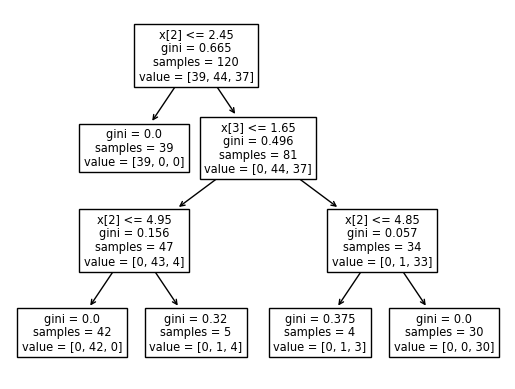

In [25]:
tree.plot_tree(clf_gini)

[Text(0.375, 0.875, 'x[2] <= 2.45\nentropy = 1.581\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\nentropy = 0.42\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(0.375, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\nentropy = 0.191\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.625, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

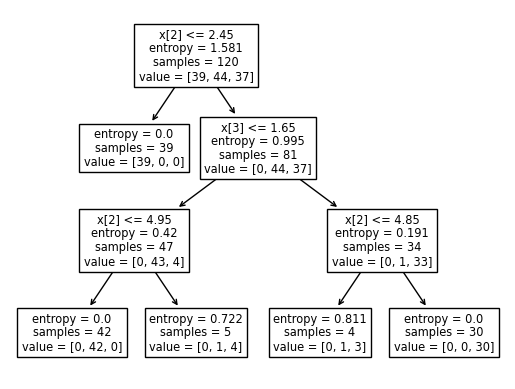

In [26]:
tree.plot_tree(clf_entropy)